In [1]:

# load standard libraries

import numpy as np   # standard numerics library

import matplotlib.pyplot as plt 

from matplotlib import animation# for making plots

from IPython.display import HTML

import scipy.fftpack as ft

import cmath

%matplotlib inline

def sech(x):
    return 2/(np.exp(x)+np.exp(-x))


In [2]:
#define grid (1d)
npoints=5
L=10
def grid(npoints,L):
    dx=L/npoints
    return np.arange(-L/2,L/2,dx)
print(grid(npoints,L))

[-5. -3. -1.  1.  3.]


In [3]:
#define possible starting condition
def bright_soliton(grid,k,nu):
    return nu*sech(nu*grid)*np.exp(1j*k*grid)

def grey_soliton(grid,t=0,n=1,nu=0.5,mu=1,psi=1,cs=1):
    gamma=1/np.sqrt(1-nu**2)
    return n**0.5*(1j*nu+1/gamma*np.tanh((grid-nu*cs*t)/(np.sqrt(2)*gamma*psi)))*np.exp(1j*mu*t)
def dark_soliton(grid,t=0,n=1,mu=1,psi=1,cs=1):
    return grey_soliton(grid,t=0,n=1,nu=0,mu=1,psi=1,cs=1)

The governing Hamiltonian for a 1D Bose Gase:
$H=\frac{\partial^2}{2\partial x^2}+g\rho+V(x)$

In [26]:
#define HI and HII
#HI interaction term
def TI(phi,dt,g=1):
    I=g*np.sqrt(np.conjugate(phi)*phi)
    return np.diag(np.exp(-1j*dt*I))
#plt.plot(TI(bright_soliton(grid,1,1),1))
#HII kinetik term in momentum space
def TII(grid,dt):
    npoints=len(grid)
    L=grid[-1]-grid[0]
    k1=np.arange(npoints/2)
    k2=np.arange(-npoints/2,0)
    k=np.append(k1,k2)
    p=k*2*np.pi/L
    return np.diag(np.exp(-1j*dt*p**2/2))
print(TI(bright_soliton(grid(2,L),1,1),1))
print(TII(grid(2,L),1))

[[ 0.99990921-0.01347487j  0.00000000+0.j        ]
 [ 0.00000000+0.j          0.54030231-0.84147098j]]
[[ 1.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.70415187-0.71004939j]]


/home/jeremias/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


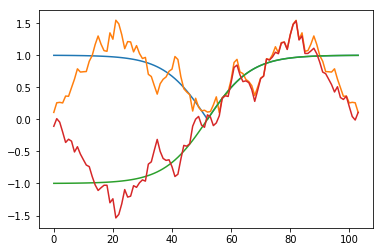

In [27]:


#define timestep
def stepper(f,dt,grid,**kwargs):
    f=f(grid,**kwargs)
    #f=TI(f,dt)@f
    fk=np.fft.fft(f)
    fkdt=TII(grid,dt)@fk
    fdt=np.fft.ifft(fkdt)
    return fdt
    
'''def time_evo(f: callable,grid,tsteps,dt,**kwargs):
    f=f(grid,**kwargs)
    M=np.array([f])
    for j in range(tsteps):
        M=np.vstack((M,np.fft.ifft(TII(grid,dt)@np.fft.fft(TI(M[:][j],dt)@(M[:][j])))))
    return grid,M   '''
    
z=grid(104,10)
darkdt=stepper(dark_soliton,1,z,t=3)
#iterate over timestep

#plot
#bright_soliton(grid,1,1)
dark_soliton(z)
plt.plot(np.abs(dark_soliton(z,t=3)))
plt.plot(np.abs(darkdt))
plt.plot(dark_soliton(z,t=3))
plt.plot(darkdt)

/home/jeremias/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


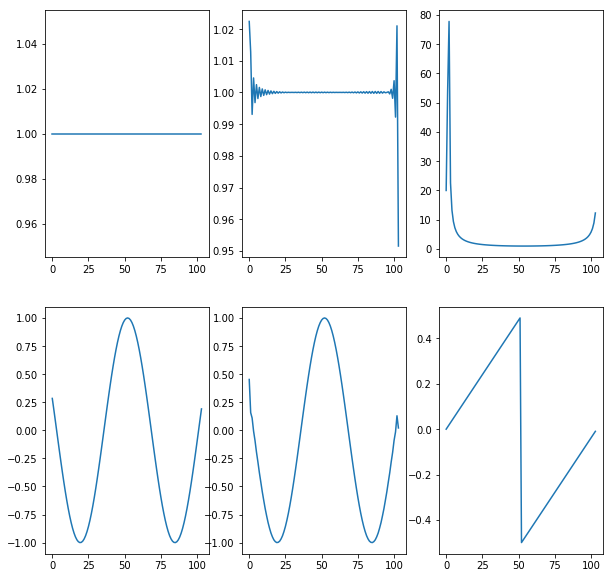

In [47]:
z=grid(104,10)
dt=0.001
def sin(x):
    return np.exp(1j*x)
k=np.fft.fftfreq?
sindt=stepper(sin,dt,z)

fk=np.fft.fft(sin(z))
fkdt=TII(z,dt)@fk
fdt=np.fft.ifft(fkdt)
#TII=TII(z,dt)
fig, ax=plt.subplots(2,3,figsize=(10,10))
ax[0][0].plot(np.abs(sin(z)))
ax[0][1].plot(np.abs(sindt))
ax[1][0].plot(sin(z))
#ax[1][2].plot(fk)
ax[0][2].plot(np.abs(fkdt))
ax[1][1].plot(sindt)
ax[1][2].plot(k)

In [ ]:
k=np.fft.fftfreq

In [ ]:
k=np.fft.fftfreq

In [6]:
#iterate over timestep
def time_evolution(phi,grid,T,tsteps,kwargs):
    dt=T/tsteps
    A=np.empty((len(grid),tsteps))

/home/jeremias/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'numpy rücktransformation')

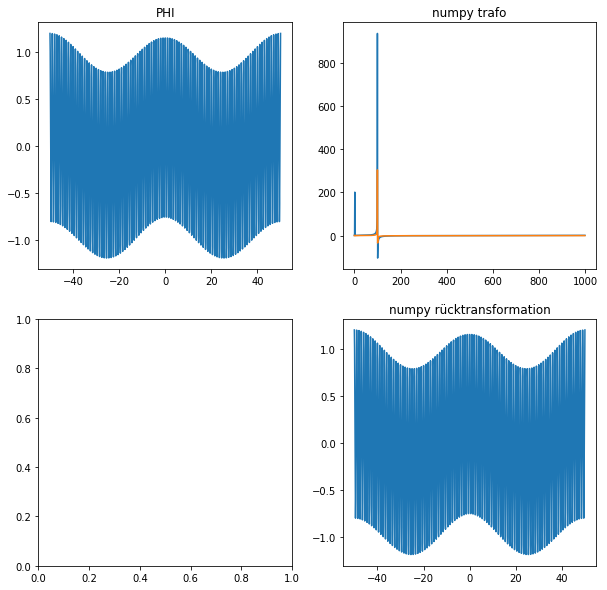

In [7]:
#Testing the transformations
#define grid
N=1000
x=np.linspace(-50,50,N)
#functions for testing
PHI=np.exp(2*np.pi*1j*x)+0.2*np.exp(2*np.pi*1j*x/50)
#PHI=gaussian(x,20,0.5)
#PHI=np.zeros(len(x))+1
step=np.zeros(len(x))


#transform numpy functions
fF=np.fft.fft(PHI)
fphi=np.fft.ifft(fF)

#define array to sort elements in the way they are displayed 

#k=np.fft.fftfreq(N)
#plot
fig, ax =plt.subplots(2,2,figsize=(10,10))

ax[0][0].plot(x,PHI)
ax[0][0].set_title('PHI')

ax[0][1].plot(np.real(fF))
ax[0][1].set_title('numpy trafo')

ax[0][1].plot(np.imag(fF))
ax[0][1].set_title('numpy trafo')

ax[1][1].plot(x,fphi)
ax[1][1].set_title('numpy rücktransformation')
